# M2: Basic Graphing Assignment 

This Jupyter notebook uses three data files that were distributed with the course files: OpiodsVA.csv, presidents.csv, TOTALNSA.csv. 

For each data source, responses are genereted below to answer the questions posed in the assignment instructions. 

For each file, the pandas package will be used to generate the data frame for the plot and the matplotlib package will be used to create the graphs. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Introduction to Opiods in Virginia

To answer both questions, I chose to use a scatterplot as it is a great way to visualize the relationship between the x and y variables.

In [3]:
""" Import the Opiod's VA CSV File into Jupyter"""
df_opVa = pd.read_csv('OpidsVA.csv')
df_opVa.head()

,FIPSCode,CountyName,FFHO-Rate,FPOO-Rate,HIV-Rate,MedianHouseholdIncome
0,51001,Accomack,12.1,12.1,3.0,39040
1,51003,Albemarle,0.9,0.9,2.8,73132
2,51005,Alleghany,6.4,12.8,6.4,47037
3,51007,Amelia,7.7,0.0,7.7,56172
4,51009,Amherst,3.2,6.3,6.3,46497


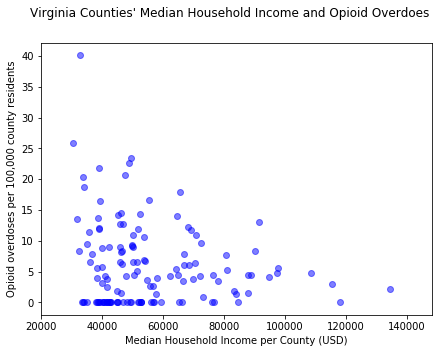

In [48]:
""" Format of the scatterplot method is as follows: ax.scatter(x-series, y-series) """
fig, ax = plt.subplots()
""" 
ax.scatter() statement creates scatterplot
The 'alpha' parameter controls dot transparency: 1 = solid, <1 = various transparency levels, 0 = no mark
The c parameter designates color of the dots: 'b' stands for blue  
"""
ax.scatter(df_opVa['MedianHouseholdIncome'], df_opVa['FPOO-Rate'], alpha=0.5, c = 'b')  
fig.suptitle("Virginia Counties' Median Household Income and Opioid Overdoes")   # Graph title
ax.xaxis.set_label_text('Median Household Income per County (USD)')  # x-axis caption
ax.yaxis.set_label_text('Opioid overdoses per 100,000 county residents')       # y-axis caption
ax.set_xlim(20000,max(df_opVa['MedianHouseholdIncome']*1.1)) # Set Limit
fig.set_size_inches(7,5)
plt.show()

Opiods overdoses do tend to occur more often in the areas which have a lower median household income.

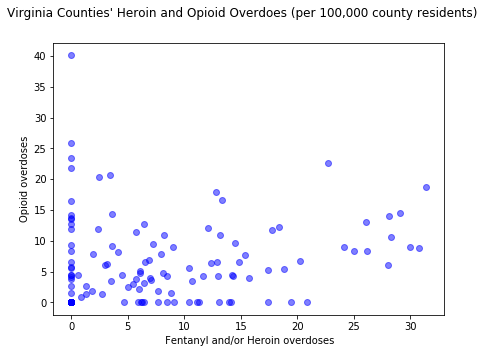

In [7]:
""" Format of the scatterplot method is as follows: ax.scatter(x-series, y-series) """
fig, ax = plt.subplots()

"""
ax.scatter() statement creates scatterplot
The 'alpha' parameter controls dot transparency: 1 = solid, <1 = various transparency levels, 0 = no mark
The c parameter designates color of the dots: 'b' stands for blue  
"""
ax.scatter(df_opVa['FFHO-Rate'], df_opVa['FPOO-Rate'], alpha=0.5, c = 'b')  
fig.suptitle("Virginia Counties' Heroin and Opioid Overdoes (per 100,000 county residents)")   # Graph title
ax.xaxis.set_label_text(' Fentanyl and/or Heroin overdoses')  # x-axis caption
ax.yaxis.set_label_text('Opioid overdoses')       # y-axis caption
fig.set_size_inches(7,5)
plt.show()

As noted with the many occurances in the lower left, there doesn't seem to be a strong relationship with the overdoeses of both opiod and heroin for the Virgina Counties

## Intro to Presidents and their Birthplaces

In order to determine which states are with the greatest number of US presidents in terms of thier birthplaces, I chose to visualize the data with a pareto chart because it would highlight the states with the highest number of presidents born within the state.

In [38]:
""" Import the Opiod's VA CSV File into Jupyter"""
df_pres = pd.read_csv('presidents.csv')
df_pres.head()

,Name,Location,State
0,George Washington,Westmoreland County,Virginia
1,John Adams,Braintree,Massachusetts
2,Thomas Jefferson,Shadwell,Virginia
3,James Madison,Port Conway,Virginia
4,James Monroe,Monroe Hall,Virginia


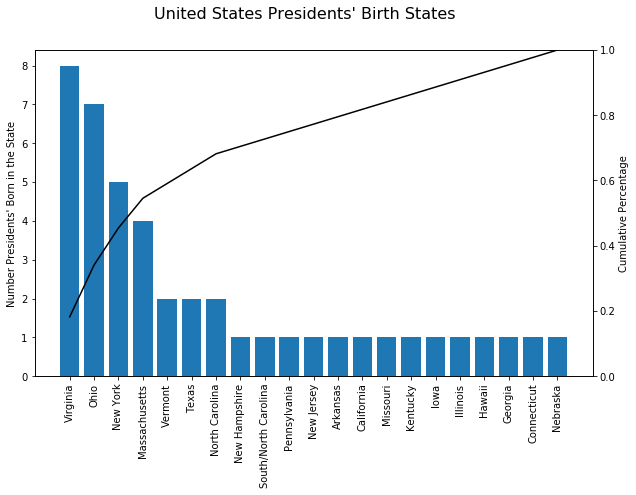

In [50]:
#bSt will be a Data Frame which includes the Birth States and Counts
bSt = df_pres.set_index(['Name','State']).count(level = 'State') #
# Sorts from the Highest to the Lowest
bSt.sort_values(by='Location', ascending=False, inplace=True)

# I chose to use a pareto chart as it would easily show the state where the highest number of presidents were born

""" Create cumulative percentage data series """
bSt_cum = []
for i in range(len(bSt)):
    bSt_cum.append(sum(bSt['Location'][0:i+1])/sum(bSt['Location']))

# Create plot and set figure object settings
fig, ax = plt.subplots()
fig.suptitle("United States Presidents' Birth States", fontsize = 16)
fig.set_size_inches(10,6)

# Set bar chart parameters
ax.bar(bSt.index,bSt['Location'], align='center')
#ax.set_ylim(0,sum(bSt['Location']))   # set limits on first y-axis to align with second y-axis
ax.yaxis.set_label_text("Number Presidents' Born in the State")    

plt.xticks(rotation=90) # Rotates the Axis Labels
# Construct a second y-axis
ax1 = ax.twinx()
ax1.plot(bSt_cum,color='k')
ax1.set_ylim(0,1)     # The second y-axis is a percentage scale from zero to 100%
ax1.yaxis.set_label_text("Cumulative Percentage")
plt.show()

Virginia is the state with the greatest number of US presidents in terms of their birthplaces. 

## Intro to United States Vehicle Sales

To see how vehicle sales in the Unitied States varied over time, I chose to use a line graph as it shows temporal data effectively. Additionally, I chose to annualize the monthly data to remove some of the annual seasonality due to the number of years associated with the data set.

In [53]:
""" Import the Opiod's VA CSV File into Jupyter"""
df_veh = pd.read_csv('TOTALNSA.csv', parse_dates=["DATE"], index_col = "DATE")
df_veh.tail()

,TOTALNSA
DATE,
2018-05-01,1626.487
2018-06-01,1586.668
2018-07-01,1403.206
2018-08-01,1521.287
2018-09-01,1469.569


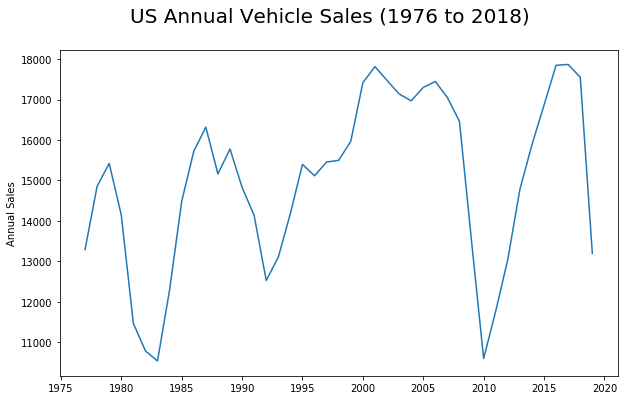

In [58]:
# Resample Will Get the Annual Data
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
df_vehAnnual = df_veh.resample('Y').sum() 

# I chose to use a line graph as it shows temporal data effectively.
fig,ax = plt.subplots()
fig.suptitle('US Annual Vehicle Sales (1976 to 2018)', fontsize = 20)

ax.plot(df_vehAnnual)
ax.set_ylabel('Annual Sales')
fig.set_size_inches(10,6)

plt.show()

Vehicle sales seem to to move relative to the health of the US Economy. For example, there is a fall in the vehicle market in the late 1970s, late 1980s, and late 2000s. Once the economy improved, then vehicle sales increased until the next recession.